In [ ]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import geopandas as gpd
!pip install cartopy
from cartopy import crs

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.8/11.8 MB 86.3 MB/s eta 0:00:00


In [ ]:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
type(world)

<ipython-input-2-bc8eadda4db1>:1: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


geopandas.geodataframe.GeoDataFrame

In [ ]:
type(world.geometry)

geopandas.geoseries.GeoSeries

In [ ]:
world.geometry.name

'geometry'

In [ ]:
world.head()

,pop_est,continent,name,iso_a3,gdp_md_est,geometry
0,889953.0,Oceania,Fiji,FJI,5496,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
1,58005463.0,Africa,Tanzania,TZA,63177,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
2,603253.0,Africa,W. Sahara,ESH,907,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
3,37589262.0,North America,Canada,CAN,1736425,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
4,328239523.0,North America,United States of America,USA,21433226,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."


<Axes: >

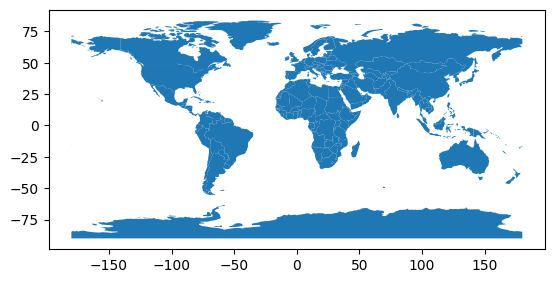

In [ ]:
world.plot()

In [ ]:
type(world.centroid)

<ipython-input-7-fdc791b40e4a>:1: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  type(world.centroid)


geopandas.geoseries.GeoSeries

In [ ]:
world['centroids'] = world.centroid
world.head()

<ipython-input-8-9065eadb13fd>:1: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  world['centroids'] = world.centroid


,pop_est,continent,name,iso_a3,gdp_md_est,geometry,centroids
0,889953.0,Oceania,Fiji,FJI,5496,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000...",POINT (163.85316 -17.31631)
1,58005463.0,Africa,Tanzania,TZA,63177,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982...",POINT (34.75299 -6.25773)
2,603253.0,Africa,W. Sahara,ESH,907,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948...",POINT (-12.13783 24.29117)
3,37589262.0,North America,Canada,CAN,1736425,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742...",POINT (-98.14238 61.46908)
4,328239523.0,North America,United States of America,USA,21433226,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000...",POINT (-112.59944 45.70563)


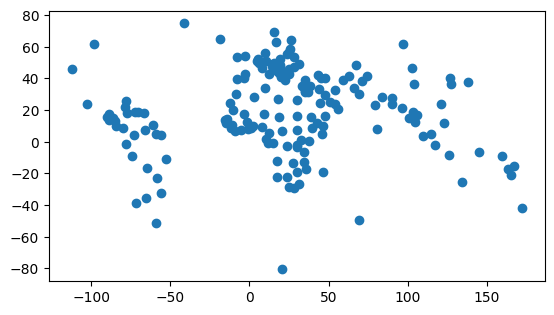

In [ ]:
world = world.set_geometry('centroids') # change the active geometry column
world.plot();

In [ ]:
crs.PlateCarree()

/usr/local/lib/python3.10/dist-packages/cartopy/io/__init__.py:241: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/110m_physical/ne_110m_coastline.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)


<Projected CRS: +proj=eqc +ellps=WGS84 +a=6378137.0 +lon_0=0.0 +to ...>
Name: unknown
Axis Info [cartesian]:
- E[east]: Easting (unknown)
- N[north]: Northing (unknown)
- h[up]: Ellipsoidal height (metre)
Area of Use:
- undefined
Coordinate Operation:
- name: unknown
- method: Equidistant Cylindrical
Datum: Unknown based on WGS 84 ellipsoid
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [ ]:
world.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

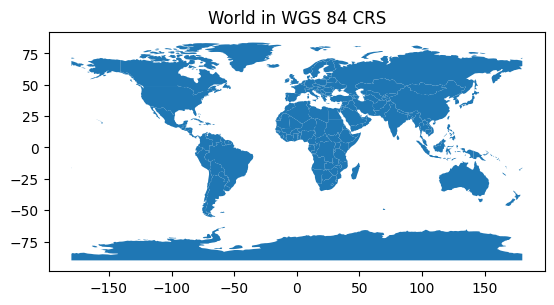

In [ ]:
world = world.set_geometry('geometry') # set the active geometry
world.plot(); plt.title('World in WGS 84 CRS');

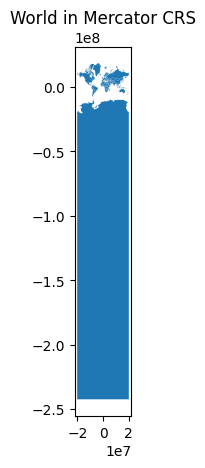

In [ ]:

world_Mercator = world.to_crs("EPSG:3395")
world_Mercator.plot();
plt.title('World in Mercator CRS');

In [ ]:
ae = crs.AzimuthalEquidistant()
type(ae)

cartopy.crs.AzimuthalEquidistant

<Axes: >

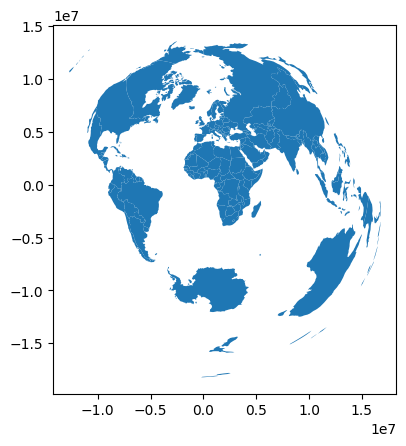

In [ ]:
aeproj4 = ae.proj4_init # Convert to`proj4` string/dict usable in gpd
world_ae = world.to_crs(aeproj4) # Then call to_crs method
world_ae.plot()

In [ ]:
crs.AzimuthalEquidistant(central_longitude=200, central_latitude=10)

<Projected CRS: +proj=aeqd +ellps=WGS84 +lon_0=200 +lat_0=10 +x_0= ...>
Name: unknown
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- undefined
Coordinate Operation:
- name: unknown
- method: Modified Azimuthal Equidistant
Datum: Unknown based on WGS 84 ellipsoid
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [ ]:
aea = crs.AlbersEqualArea()
aea

<Projected CRS: +proj=aea +ellps=WGS84 +lon_0=0.0 +lat_0=0.0 +x_0= ...>
Name: unknown
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- undefined
Coordinate Operation:
- name: unknown
- method: Albers Equal Area
Datum: Unknown based on WGS 84 ellipsoid
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [ ]:
aea_geo = [aea.project_geometry(ii, src_crs=ae)
for ii in world_ae['geometry'].values]

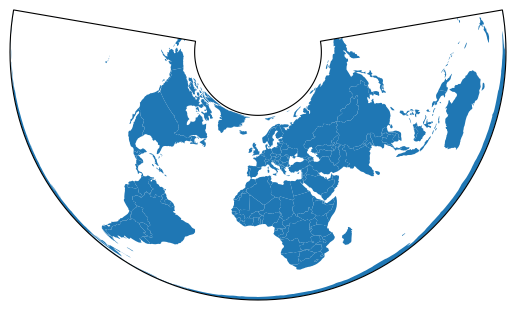

In [ ]:
fig, ax = plt.subplots(subplot_kw={'projection': aea})
ax.add_geometries(aea_geo, crs=aea);

In [ ]:

!pip install gitpython

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 190.6/190.6 kB 3.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 7.1 MB/s eta 0:00:00


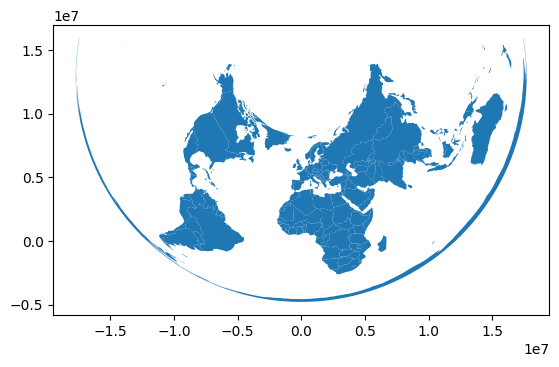

In [ ]:
gpd.GeoDataFrame(world, geometry=aea_geo, crs=aea.proj4_init).plot();

In [ ]:
import os
from git import Repo

In [ ]:
!pip install gitpython

In [ ]:
covidfolder = '../../data_external/covid19'
if os.path.isdir(covidfolder): # if repo exists, pull newest data
   repo = Repo(covidfolder)
   repo.remotes.origin.pull()
else: # otherwise, clone from remote
   repo = Repo.clone_from('https://github.com/CSSEGISandData/COVID-19.git',covidfolder)

datadir = repo.working_dir + '/csse_covid_19_data/csse_covid_19_time_series'
f = datadir + '/time_series_covid19_confirmed_global.csv'

In [ ]:

c = pd.read_csv(os.path.abspath(f))
c = c.rename(columns={'Country/Region': 'country'}).iloc[:, 1:]
c.head()

,country,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,...,2/28/23,3/1/23,3/2/23,3/3/23,3/4/23,3/5/23,3/6/23,3/7/23,3/8/23,3/9/23
0,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,0,...,209322,209340,209358,209362,209369,209390,209406,209436,209451,209451
1,Albania,41.15330,20.168300,0,0,0,0,0,0,0,...,334391,334408,334408,334427,334427,334427,334427,334427,334443,334457
2,Algeria,28.03390,1.659600,0,0,0,0,0,0,0,...,271441,271448,271463,271469,271469,271477,271477,271490,271494,271496
3,Andorra,42.50630,1.521800,0,0,0,0,0,0,0,...,47866,47875,47875,47875,47875,47875,47875,47875,47890,47890
4,Angola,-11.20270,17.873900,0,0,0,0,0,0,0,...,105255,105277,105277,105277,105277,105277,105277,105277,105288,105288


In [ ]:
len(c['country']) - len(set(c['country']))

88

In [ ]:
cg = c.groupby('country')[c.columns[3:]].sum()
cg['Lat'] = c.groupby('country')['Lat'].mean()
cg['Long'] = c.groupby('country')['Long'].mean()

In [ ]:
geo = gpd.points_from_xy(cg['Long'], cg['Lat'])
c_aea_geo = [aea.project_geometry(ii) for ii in geo]
cg = gpd.GeoDataFrame(cg, geometry=c_aea_geo, crs=aea.proj4_init)

In [ ]:
def covidworldmap(date):

    fig, ax = plt.subplots(figsize=(12, 10))
    # put the world map on an axis
    w = gpd.GeoDataFrame(world, geometry=aea_geo, crs=aea.proj4_init)
    w.plot(ax=ax, color='midnightblue', edgecolor='darkslategray')
    ax.set_facecolor('dimgray')
    mx = cg.iloc[:, :-3].max().max() # get max across data
    # set marker sizes, with a min marker size for cases > 1000
    msz = 500 * np.where(cg[date]-1000, np.maximum(cg[date]/mx, 0.001), 0)
    cg.plot(ax=ax, cmap='Wistia', markersize=msz, alpha=0.5)
    ax.set_xticks([]) # remove axis marks
    ax.set_yticks([]);

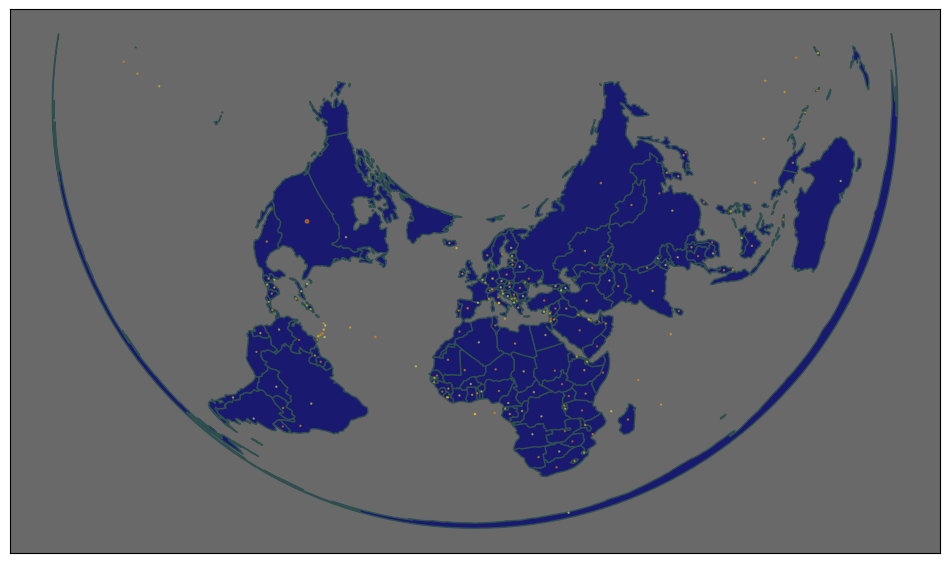

In [ ]:
covidworldmap('5/5/20')